In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Cleaned_Diabetes.csv') # replace with actual filename from upload

Saving Cleaned_Diabetes.csv to Cleaned_Diabetes.csv


In [4]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

#### **Diabetes_binary's correlation with other columns**
- threshold = 0.1
- if |correlation| >= threshold we consider the feature is correlated with Diabetes_binary

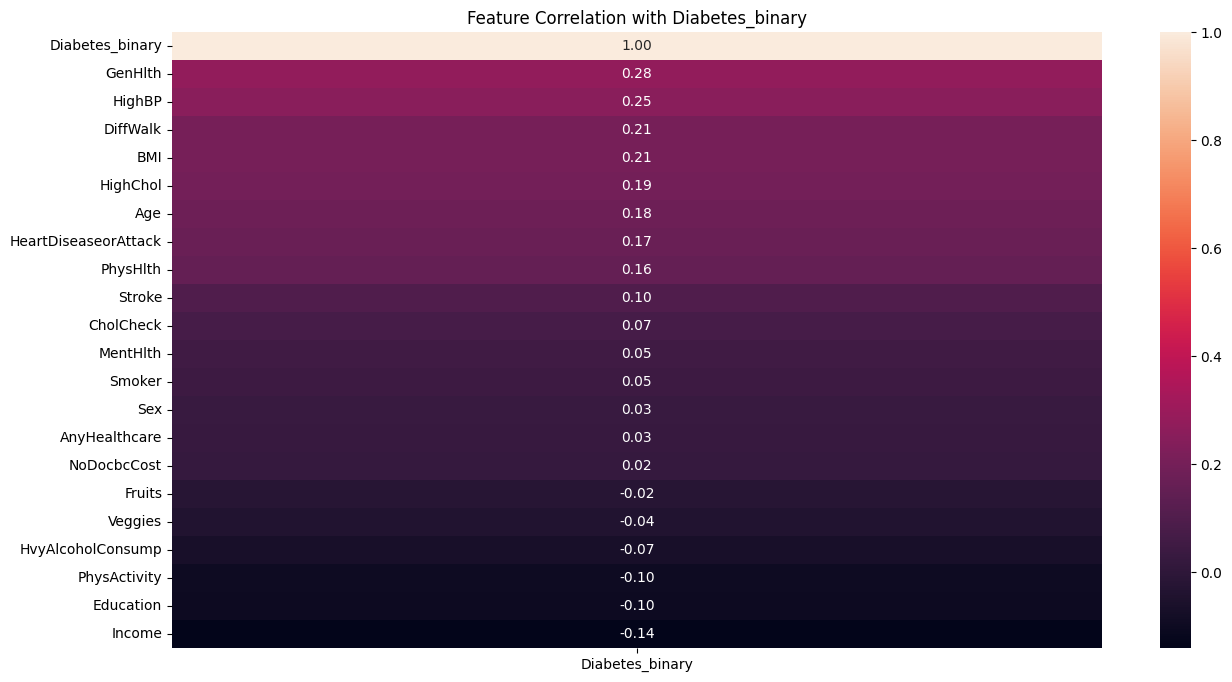

In [6]:
cor_matrix = df.corr()

#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cor_matrix[['Diabetes_binary']].sort_values(by='Diabetes_binary' , ascending= False) , annot=True, cmap='rocket' , fmt='.2f')
plt.title('Feature Correlation with Diabetes_binary')
plt.show()

- Postive correlated : `HighBP` , `HighChol` , `BMI` , `DiffWalk` , `GenHlth` , `Age` , `HeartDiseaseorAttack` , `PhysHlth` and `Stroke`
- Negative correlated : `PhysActivity` , `Education` and `income`

### Try to find best features with Chi-Squared and Anova-Test

In [7]:
from sklearn.feature_selection import SelectKBest , chi2 , f_classif
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Diabetes_binary' , axis=1)
y = df['Diabetes_binary']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Squared
chi2_selector = SelectKBest(chi2 , k='all')
X_chi2 = chi2_selector.fit_transform(X_scaled , y)
chi_scores = pd.Series(chi2_selector.scores_ , index=X.columns).sort_values(ascending=False)

# Apply Anova
anova_selector = SelectKBest(f_classif , k='all')
X_anova = anova_selector.fit_transform(X_scaled , y)
anova_scores = pd.Series(anova_selector.scores_ , index=X.columns).sort_values(ascending=False)

In [8]:
chi_scores

,0
HighBP,8098.548237
DiffWalk,7875.496177
HeartDiseaseorAttack,5822.145697
HighChol,4869.312739
PhysHlth,3266.292056
GenHlth,3115.279621
Stroke,2156.678382
HvyAlcoholConsump,937.401148
Age,812.103743
PhysActivity,617.563886


#### Best Features By Chi-Squared Test
1. HighBP
2. DiffWalk
3. HeartDiseaseorAttack
4. HighChol
5. PhysHlth
6. GenHlth
7. Stroke

In [9]:
anova_scores

,0
GenHlth,19061.436601
HighBP,15868.017696
DiffWalk,10097.616798
BMI,10075.425186
HighChol,9065.177413
Age,7444.458687
HeartDiseaseorAttack,6682.140008
PhysHlth,5739.591424
Income,4631.714144
Education,2445.440895


#### Best Features By Anova Test
1. GenHlth
2. HighBP
3. DiffWalk
4. BMI
5. HighChol
6. Age
7. HeartDiseaseorAttack

## Top Features For the ML Models
- HighBP
- GenHlth
- DiffWalk
- BMI
- HighChol
- HeartDiseaseorAttack
- PhysHlth
- Age
- Stroke
- Income

In [10]:
# drop unused columns
top_features = ['HighBP', 'GenHlth', 'DiffWalk', 'BMI', 'HighChol', 'HeartDiseaseorAttack', 'PhysHlth', 'Age', 'Stroke', 'Income']
X_top = df[top_features]
y = df['Diabetes_binary']
X_top.head()

,HighBP,GenHlth,DiffWalk,BMI,HighChol,HeartDiseaseorAttack,PhysHlth,Age,Stroke,Income
0,1.0,5.0,1.0,40.0,1.0,0.0,15.0,9.0,0.0,3.0
1,0.0,3.0,0.0,25.0,0.0,0.0,0.0,7.0,0.0,1.0
2,1.0,5.0,1.0,28.0,1.0,0.0,30.0,9.0,0.0,8.0
3,1.0,2.0,0.0,27.0,0.0,0.0,0.0,11.0,0.0,6.0
4,1.0,2.0,0.0,24.0,1.0,0.0,0.0,11.0,0.0,4.0


## Deal with imbalance

In [11]:
y.value_counts()

,count
Diabetes_binary,
0.0,194377
1.0,35097


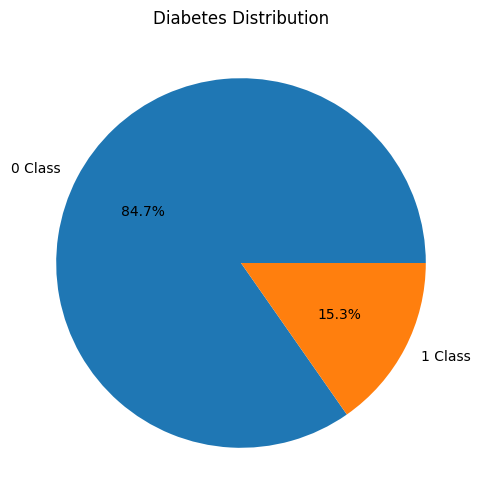

In [12]:
plt.figure(figsize=(8,6))
plt.pie(y.value_counts() , labels=['0 Class' , '1 Class'] , autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42 , stratify= y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183579, 10), (45895, 10), (183579,), (45895,))

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
X_resampled.shape, y_resampled.shape

((388754, 21), (388754,))

In [16]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42 , stratify= y_resampled)
X_train_resampled.shape, X_test_resampled.shape, y_train_resampled.shape, y_test_resampled.shape

((311003, 21), (77751, 21), (311003,), (77751,))

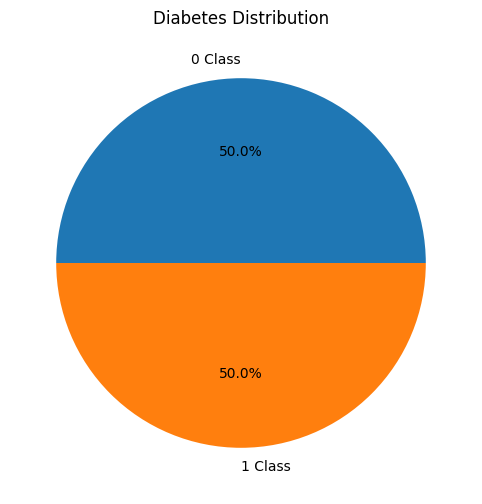

In [17]:
plt.figure(figsize=(8,6))
plt.pie(y_train_resampled.value_counts() , labels=['0 Class' , '1 Class'] , autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.show()

* Now the trained data is balanced



# Logistic

In [18]:
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__solver': ['liblinear', 'lbfgs'] # Changed 'classifier__solver' to 'logisticregression__solver'
}

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



log_pip = make_pipeline(StandardScaler(), LogisticRegression())

log_grid_search = GridSearchCV(log_pip, param_grid, cv=5)
log_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__solver': ['liblinear', 'lbfgs']})

In [20]:
log_grid_search.best_params_

{'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}

In [21]:
y_pred = log_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))


0.7422412573471724


In [22]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     38876
         1.0       0.73      0.78      0.75     38875

    accuracy                           0.74     77751
   macro avg       0.74      0.74      0.74     77751
weighted avg       0.74      0.74      0.74     77751



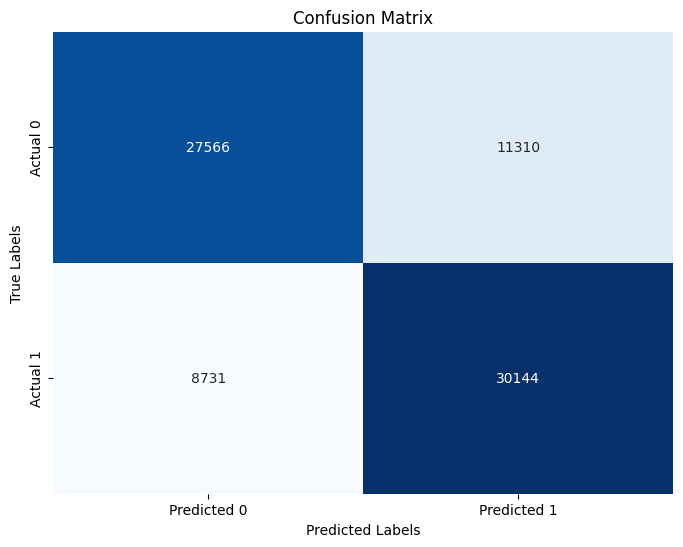

In [23]:
cm1 = confusion_matrix(y_test_resampled, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Desicion Tree

In [24]:
dt_param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_pip = make_pipeline(StandardScaler(), DecisionTreeClassifier())

dt_grid_search = GridSearchCV(dt_pip, dt_param_grid, cv=5)
dt_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]})

In [26]:
y_pred = dt_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))

0.8760015948347931


In [27]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     38876
         1.0       0.90      0.85      0.87     38875

    accuracy                           0.88     77751
   macro avg       0.88      0.88      0.88     77751
weighted avg       0.88      0.88      0.88     77751



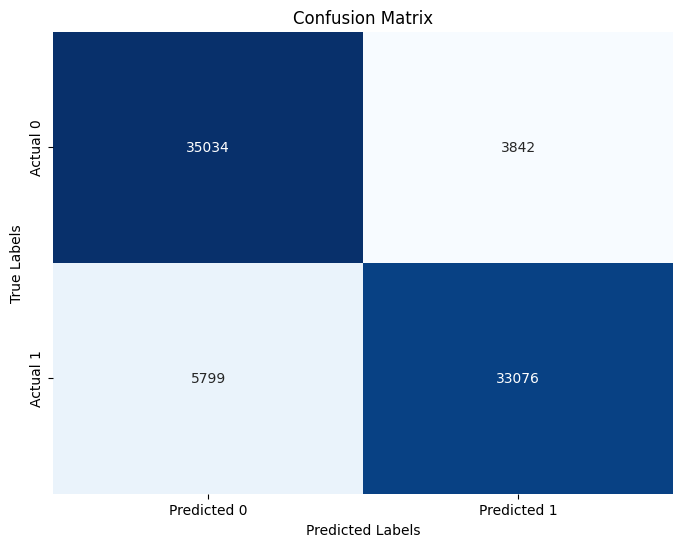

In [28]:
cm2= confusion_matrix(y_test_resampled, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# RandomForest

In [29]:
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100],          # Reasonable default
    'randomforestclassifier__max_depth': [10, 20],          # Reasonable control of complexity
    'randomforestclassifier__min_samples_split': [2, 5],    # Minimal branching options
    'randomforestclassifier__min_samples_leaf': [1, 2]      # Leaf options
}

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_pip = make_pipeline(StandardScaler() , RandomForestClassifier())

rf_grid_search = GridSearchCV(rf_pip, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [10, 20],
                         'randomforestclassifier__min_samples_leaf': [1, 2],
                         'randomforestclassifier__min_samples_split': [2, 5],
                         'randomforestclassifier__n_estimators': [100]})

In [31]:
y_pred = rf_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))

0.9022134763540018


In [32]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     38876
         1.0       0.93      0.87      0.90     38875

    accuracy                           0.90     77751
   macro avg       0.90      0.90      0.90     77751
weighted avg       0.90      0.90      0.90     77751



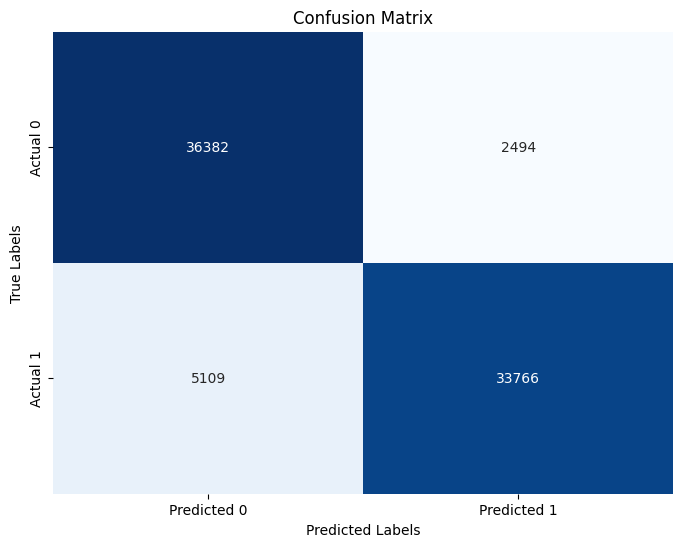

In [33]:
cm3 = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XGBoost

In [34]:
xgb_param_grid = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [3, 6, 10],
    'xgbclassifier__learning_rate': [0.01, 0.1],
    'xgbclassifier__subsample': [0.8, 1],
    'xgbclassifier__colsample_bytree': [0.8, 1]
}

In [35]:
from xgboost import XGBClassifier

xgb_pip = make_pipeline(StandardScaler() , XGBClassifier())

xgb_grid_search = GridSearchCV(xgb_pip, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.8, 1],
                         'xgbclassifier__learning_rate': [0.01, 0.1],
                         'xgbclassifier__max_depth': [3, 6, 10],
                         'xgbclassifier__n_estimators': [100, 200],
                         'xgbclassifier__subsample': [0.8, 1]})

In [36]:
y_pred = xgb_grid_search.predict(X_test_resampled)

print(accuracy_score(y_test_resampled, y_pred))

0.9095831564867333


In [37]:
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     38876
         1.0       0.97      0.85      0.90     38875

    accuracy                           0.91     77751
   macro avg       0.92      0.91      0.91     77751
weighted avg       0.92      0.91      0.91     77751



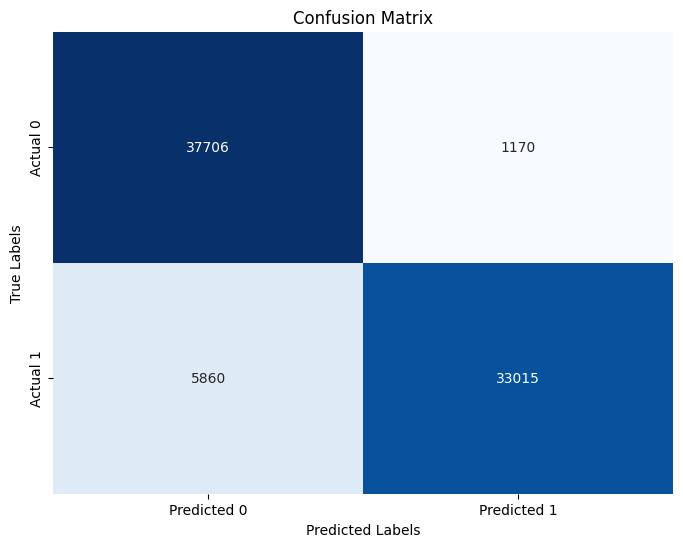

In [38]:
cm4= confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Best Model Accuracy and Metrics : XGBoost

In [41]:
import pickle

# Save the trained XGBoost model (or pipeline + gridsearch)
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_grid_search, file)

In [42]:
from google.colab import files
files.download('xgboost_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>